# Monocentric city model - square root utility

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from math import pi
from scipy.integrate import quad
plt.style.use('ggplot')

Check out the [Desmos Notebook](https://www.desmos.com/calculator/8khfcor9as) that illustrates the model.

In [42]:
α = 3.
# defining the group
class Group:
    def __init__(self,y,ū,t):
        self.y = y
        self.ū = ū
        self.t = t
    
    def p̄(self,x): #we derived this from u(s,z) = z + 2 (αs)^(.5)
        return α/(self.ū+self.t*x - self.y)
    
    def s̄(self,x):
        return α/(self.p̄(x)**2)
    
    def N(self,xa):
        return quad(lambda r: 2*pi*r/self.s̄(r),0,xa)[0]
    
    def NVectorized(self,xa):
        return np.vectorize(self.N)(xa)
    

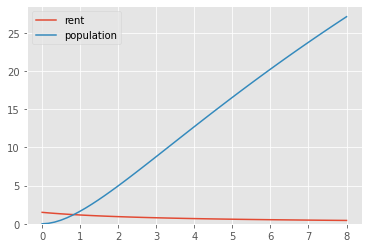

In [43]:
# inspect the functions with some random choice of ū
g1 = Group(4,6.,.6) #income, utility, travel cost
xs = np.linspace(0,8,50)
ps = g1.p̄(xs) 
Ns = g1.NVectorized(xs) 
plt.plot(xs,ps,label='rent')
plt.plot(xs,Ns,label='population')
plt.ylim(0,plt.ylim()[1])
plt.legend()

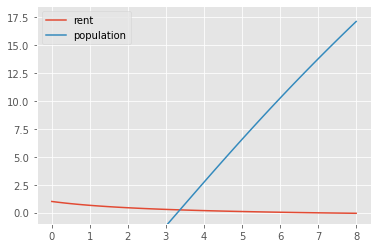

In [40]:
# check where the roots are in a closed city model with N̂=10, pa=.5
pa = 0.5
N̂ = 10.
plt.plot(xs,ps-pa,label='rent')
plt.plot(xs,Ns - N̂,label='population')
plt.ylim(-1,plt.ylim()[1])
plt.legend()

We can see that the two functions have different roots.

In [41]:
#find the value of ū for which their root coincide
def rootFinder(ū):
    g1.ū = ū
    xa = opt.root(lambda xa: g1.p̄(xa)-pa,x0=5).x[0] #this is the xa that balances p̄(xa) = pa
    return g1.N(xa)-N̂ #this checks whether, at the above value of xa, the population is equal to N̂

opt.root(rootFinder,x0=6) #we solve the root find problem. the resulting ū is 7.013

    fjac: array([[-1.]])
     fun: -5.329070518200751e-15
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.13482582e-10])
       r: array([8.65120576])
  status: 1
 success: True
       x: array([7.01302387])